---

# A Simple Manned Cycling Detecter Based on YOLOv3

---
>*Author: [YANG ZHAOQIN](yangznufe.github.io)*  
>*Github: [[Github of this project]](https://github.com/yangznufe/A-Simple-Manned-Cycling-Detecter-Based-on-YOLOv3),[[Github of dataset]](https://github.com/yangznufe/Manned-Cycling-Dataset-for-Object-Dectation)*  
>*Google Drive:[[Working environment of darknet in colab]](https://drive.google.com/open?id=1-AD1oouVZ0la1pTZpk9FhySOhP70g0Rr)*  
>*Running Time: more than 5 hours(if training the model)*  

---
# 0. Contents
---
>### 1. Introduction
>### 2. Method
>  - 2.1 Object detection model: YOLOv3
>  - 2.2 Data collection
>  - 2.3 Software and hardware environment: COLAB   
>
>### 3. Data presentation
>  - 3.1 Real world image
>  - 3.2 HOG picture features display
>  - 3.3 Annotations: Bounding Box
>  - 3.4 Distribution of the annotations： find out the suitable Anchor   
>
>### 4. Data Augmentation   
> 
>
>### 5. Build Darknet environment in Colab   
>
>### 6. Model training   
>  - 6.1 Train your own YOLOv3 detector
>  - 6.2 Visualization of training process  
>
>### 7. Results and discuss   
>  - 7.1 Model performance testing at various stages in the training process
>  - 7.2 Model performance testing in a real world video   
>
>### 8. Conclusion   
>### 9. References

---
# 1. Introduction
---
 
With the rapid development of China's urbanization and the improvement of transportation infrastructure, more and more residents are moving from rural areas to cities, so motor vehicles and non-motor vehicles on the road continue to rise, and the road conditions in small towns have become more and more complex. Among them, non-motor vehicles have been playing the role of victims in traffic accidents due to the lack of protection measures. The danger of non-motor vehicles, such as electric vehicles and bicycles, mainly comes from two aspects: the dangerous environment and the dangerous behavior of cyclists. However, due to the large number of non-motor vehicles, it is difficult to manage, so the current measures to reduce traffic accidents mainly improve the road environment through infrastructure construction, and the lack of identification and correction of non-motor vehicles' dangerous driving behavior. Recently, the explosive development of computer's technology and the rapid progress of deep learning in object detection have provided the possibility of automatically identifying and correcting dangerous driving behaviors of non-motor vehicles.  

Recently,dangerous driving behaviors such as manned riding are attracting more attention. Due to the lack of protection of non-motor vehicles, and the driving stability [2] and the braking ability are poor, so an extra person in bicycle may significantly increase the severity of the accident by 10% [1]. Therefore, many cities in China have banned the manned riding, but a large number of non-motorized vehicles and flexible riding make it very difficult to manage. Besides, the deep learning model for traffic is mainly used in the field of motor vehicle violation recognition, automatic driving, and traffic flow detection. There is no detection of dangerous driving behaviors for non-motor vehicles [3]. Despite the lack of similar research, a series of applications of deep learning in the field of transportation provide a good inspiration for the identification of dangerous driving behaviors. For example, image recognition research in the field of autonomous driving and traffic flow detection has developed target detection models for non-motor vehicles to identify and locate the location and trajectory of bicycles. The convolutional neural network for image classification such as license plate recognition and car brand recognition has laid a solid foundation for target classification. The Internet of Things and the advancement of computer technology have provided basic technologies for the rapid development and application of automation tools.

In summary, this project hopes to use deep learning object detection algorithms to develop a tool for detecting the behavior of non-motorized vehicles in urban road environments. Therefore, in this study, I first construct the data set, then analyze the image environment of the non-motorized vehicle people in the county, construct the YOLOv3 model for object detection, and adjust the hyperparameters, finally use the model to analyze the situation of urban non-motorized vehicle people.

---
# 2. Method
---
### 2.1 Object detection model:  [YOLOv3](https://pjreddie.com/media/files/papers/YOLOv3.pdf) 
  Object detection is a practical and challenging computer vision task, which can be seen as a combination of image classification and positioning. Given a picture, the object detection model would be able to identify the target object of this picture and give its position. However, because the number of objects in the picture is indefinite, and the location is uncertain, object detection is more complicated than the classification task. Despite many challenges, this technology is widely used in transportation. In recent years, the object detection algorithm has made great breakthroughs. The more popular algorithms can be divided into two categories, one is based on Region Proposal's R-CNN algorithm (R-CNN, Fast R-CNN, Faster R-CNN), they are two-stage, need to use heuristics first Method (selective search) or CNN network (RPN) generates Region Proposal, and then do classification and regression on Region Proposal. The other type is one-stage algorithms such as Yolo and SSD, which use only one CNN network to directly predict the category and location of different objects. This article uses the Yolo algorithm, which full name is "You Only Look Once: Unified, Real-Time Object Detection". Although the YOLO algorithm has been developed in 4 major versions, this article still uses the mature and lightweight algorithm: [YOLOv3](https://pjreddie.com/media/files/papers/YOLOv3.pdf) , which is widely used in the field of transportation and proved to have advantages in both speed and accuracy. In this paper, based on the pre-trained model of the [COCO data set](http://cocodataset.org/#home)[4], the collected data set is used to fine-tune the last two layers of the model. The purpose is to make up for the problem of lack of data and limited computing resources through transfer learning.[5]
![YOLOv3 Darknet-53.](img_for_yolo/Darknet-53.png)
    
### 2.2  Data collection
  The data set of this project is mainly crawled from [Baidu pictures](https://image.baidu.com/) and field collection. Among them, Baidu pictures use keywords such as "骑车载人"(manned cycling) and "载人骑行"(manned riders) to crawl. After filtering and deduplication, 158 pictures were crawled from Baidu pictures. However, the quality of the pictures collected on the network is uneven, and the performance of the test model is poor, which is quite different from the real environment. Therefore, in addition to collecting images online, 106 pictures were collected from the realworld streets of [Julu, Xingtai City, Hebei Province, China.](https://www.google.com/maps/place/%E4%B8%AD%E5%9B%BD%E6%B2%B3%E5%8C%97%E7%9C%81%E9%82%A2%E5%8F%B0%E5%B8%82%E5%B7%A8%E9%B9%BF%E5%8E%BF/@37.2167124,115.0440478,18.51z/data=!4m5!3m4!1s0x35dd7d8f72df0f5f:0x4b33dd44debbc976!8m2!3d37.221112!4d115.037477?hl=zh-CN)
  - Collection equipment：[Xiaomi MIX2](https://en.wikipedia.org/wiki/Xiaomi_Mi_MIX_2)
  - Image size：(3000，4000)
  - Collection datetime：10/04/2020 12:00 - 13:00

##### Dependent packages

In [1]:
import requests
from urllib import parse
import uuid
import os
import glob

In [ ]:
def download_img(img_url):
	#新建一个文件夹存储图片
	if not os.path.exists('img'):
		os.mkdir('img')
	img=requests.get(img_url,headers=headers,stream=True) #获取数据流
	if img: #判断img是否为空，有时候code200也不一定是有内容的
		with open('img/{}.jpg'.format(uuid.uuid4()),'wb') as f:
			chunks=img.iter_content(chunk_size=128)
			#防止CPU压力过大
			for chunk in chunks:
				f.write(chunk)
def get_json(search_word,number):
	url='https://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&ct=201326592&is=&fp=result&' \
	    'queryWord={0:}&cl=2&lm=-1&ie=utf-8&oe=utf-8&adpicid=&st=-1&z=&ic=0' \
	    '&hd=&latest=&copyright=&word={0:}&s=&se=&tab=&width=&height=&face=0&' \
	    'istype=2&qc=&nc=1&fr=&expermode=&force=&pn={1:}&rn=30&gsm=1e&1586245023192='.format(search_word,number)
	#对于url分析在Word和queryWord内的内容为转码内容可以用parse内的quote进行转码
	html=requests.get(url,headers=headers).json()['data']
	#获取json内容
	try:
		for img in html:
			img_url=img['middleURL']
			#获取图片地址传给下载器
			download_img(img_url)
	except:
		pass

headers = {'Connection': 'keep-alive','Cookie': 'BIDUPSID=48E2DA4C7FAEF38154147CE188547C90; PSTM=1585356178; BAIDUID=48E2DA4C7FAEF38115106A9F5FF76160:FG=1; H_PS_PSSID=30969_1467_31170_21110_31186_31217_30823_31163_31196; delPer=0; PSINO=1; BDORZ=B490B5EBF6F3CD402E515D22BCDA1598; BDRCVFR[X_XKQks0S63]=mk3SLVN4HKm; BDRCVFR[-pGxjrCMryR]=mk3SLVN4HKm; firstShowTip=1; BDRCVFR[dG2JNJb_ajR]=mk3SLVN4HKm',
		'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36','Referer': 'https://image.baidu.com/'}
search_word=parse.quote(input('please input the keyword:'))
for number in range(30,300,30):
	get_json(search_word,number)


In [3]:
os.listdir(r".\dataset")

['download_baidu_picture.py', 'google_img', 'realworld_img', 'test_img_video']

In [4]:
print("Number of google images: ", len(glob.glob(f"./dataset/google_img/*.jpg")))
print("Number of realworld images: ", len(glob.glob(f"./dataset/realworld_img/*.jpg")))

Number of google images:  158
Number of realworld images:  106


### 2.3   Software and hardware environment: [COLAB](https://colab.research.google.com/)  
  Since my laptop only has a very weak GPU and only 2G memory of GPU, it is completely impossible to build an environment for object detection. Fortunately, instead of spending hundreds of euro for purchasing and installing a GPU, we can train our YOLOv3 on a free, user-friendly and easy-to-use of Machine Learning Research Tool — [GOOGLE COLAB](https://colab.research.google.com/). The hardware specification provided in GOOGLE COLAB environment are (source):
    - Operating System: Ubuntu 16.04
    - GPU: 1xTesla K80 , compute 3.7, having 2496 CUDA cores , 12GB GDDR5 VRAM (most important, it is compatible with CUDA)
    - CPU: 1xsingle core hyper threaded Xeon Processors @2.3Ghz i.e(1 core, 2 threads)
    - RAM: ~12.6 GB Available
    - Disk: ~33 GB Available

---
# 3. Data presentation
---
As mentioned above, a total of 204 samples and a 90-second 720P video were collected in this project to test the speed and performance of the model. Then use [labelImg] (https://github.com/tzutalin/labelImg) for data labeling.

##### Dependent packages

In [5]:
import numpy as np
import pandas as pd 
import os
import json
import glob
import random
from IPython.display import display, display_markdown
from math import floor
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns
from PIL import Image
from tqdm.notebook import tqdm
# For HOG
from skimage.feature import hog
from skimage import io
# for K-maens
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.io as sio

##### 3.1 Real world image
The following figures show the photos taken from the traffic condiction of the town using a cellphone camera. As you can see from the pictures, the road environment is more complicated and the phenomenon of manned riding is common. And non-motorized vehicles often walk in motorized lanes, and their riding safety awareness needs to be improved.

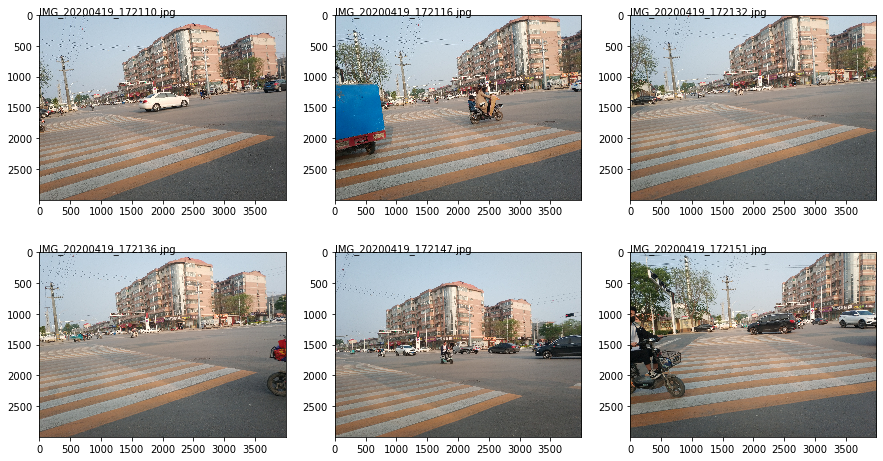

In [6]:
real_img_path = glob.glob(f"./dataset/realworld_img/*.jpg")
plt.figure(figsize = (15,8))
for i in range(1,7):
    img = real_img_path[i-1]
    plt.subplot(2,3,i)
    plt.imshow(mpimg.imread(img))
    plt.text(0,-10,img.split('\\')[1])
plt.show()

##### 3.2 [HOG](https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients) picture features display
[HOG](https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients)[6] , "Histogram of oriented gradients", is a traditional object detection method, which can well represent the image characteristics of target objects. Because it is simple and fast, before the popularize of deep learning methods, it is often used as the standard method of face recognition. From the figure below, we can see that the characteristics of the riding object and the road environment are largely different, and the characteristics of whether it is manned are difficult to distinguish, which means it is difficult to rely on a simple algorithm.

E:\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


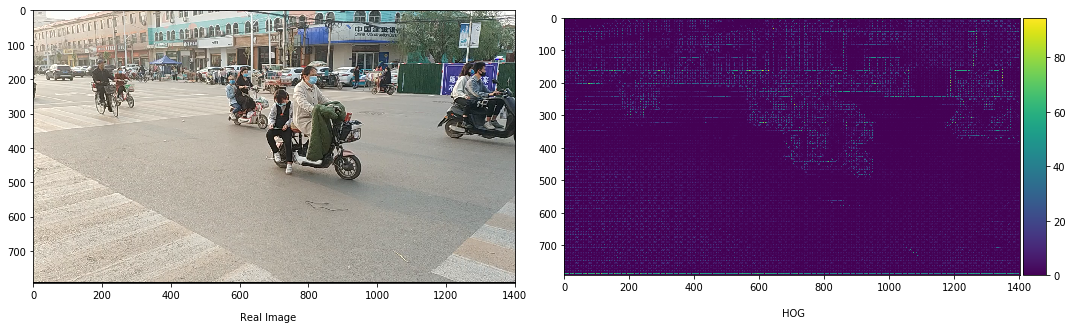

In [7]:
img = r".\dataset\test_img_video\test.png"
plt.figure(figsize = (15,10))
plt.axis('on')
plt.subplot(1,2,1)
plt.imshow(mpimg.imread(img))
plt.text(600,900,'Real Image')
im = io.imread(img)
plt.subplot(1,2,2)
normalised_blocks, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(8, 8), visualize=True)
io.imshow(hog_image)
plt.text(-1000,-15,'HOG')
plt.show()

##### 3.3 Annotations: Bounding Box
In YOLO, the model uses a box to select the target object's frame, and then gives the object a classification attribute. Although this method loses some details of the object compared to the mask annotation, those box label is simpler and more efficient in object detection. This project uses the labelImg for image labeling(这里需要一个参考文献). This tool help us to generate a txt file with the same name for each image, which stores as the Darknet YOLO format.

darknet yolo format:
```xml
<object-class> <x> <y> <width> <height>
<object-class> <x> <y> <width> <height>
...
<object-class> <x> <y> <width> <height>
```

##### Read all annotations to a dataframe

In [9]:
annotaions_filename = glob.glob(f"./dataset/realworld_img/*.txt")
annotations = pd.DataFrame()
for f in annotaions_filename:
    with open(f) as ann_data:
        for line in ann_data:
            ann_info = {}
            ann = line.split(" ")
            ann_info['path'] = f
            ann_info['class'] = ann[0]
            ann_info['x'] = float(ann[1])
            ann_info['y'] = float(ann[2])
            ann_info['width'] = float(ann[3])
            ann_info['height'] = float(ann[4])
            annotations = annotations.append(ann_info,ignore_index=True)
annotations

class    height                                             path  \
0       0  0.073000  ./dataset/realworld_img\IMG_20200419_172110.txt   
1       1  0.061333  ./dataset/realworld_img\IMG_20200419_172110.txt   
2       1  0.043000  ./dataset/realworld_img\IMG_20200419_172110.txt   
3       1  0.041000  ./dataset/realworld_img\IMG_20200419_172110.txt   
4       0  0.214000  ./dataset/realworld_img\IMG_20200419_172116.txt   
..    ...       ...                                              ...   
169     1  0.156667    ./dataset/realworld_img\wx_20200503091009.txt   
170     1  0.126667    ./dataset/realworld_img\wx_20200503091009.txt   
171     1  0.113333    ./dataset/realworld_img\wx_20200503091046.txt   
172     1  0.103333    ./dataset/realworld_img\wx_20200503091046.txt   
173     1  0.206667    ./dataset/realworld_img\wx_20200503091046.txt   

        width         x         y  
0    0.057250  0.674375  0.423500  
1    0.050000  0.087750  0.521000  
2    0.022500  0.215250  0.498833  
3    0.034000  0.716750  0.413833  
4    0.155750  0.609125  0.481000  
..        ...       ...       ...  
169  0.053333  0.210000  0.545000  
170  0.043333  0.275000  0.543333  
171  0.086667  0.360000  0.726667  
172  0.076667  0.651667  0.715000  
173  0.216667  0.775000  0.770000  

[174 rows x 6 columns]

In [10]:
# Number of two categories
Manned,Bicycle = annotations.groupby('class').size()
print('Manned Cycling in Realworld Images:',Manned)
print('Normal Cycling in Realworld Images:',Bicycle)

Manned Cycling in Realworld Images: 44
Normal Cycling in Realworld Images: 130


##### Plot the image with their annotations

In [11]:
def draw_bbox(img_path):
    img_id = img_path.split('/')[-1].split('.')[0] 
    ann_path = "./dataset/"+img_id+".txt"
    print("bbox_path:",ann_path)
    img = mpimg.imread(img_path)
    detections = annotations[annotations['path'] == ann_path]
    count = detections['path'].count()
    
    _ = plt.figure(figsize = (15,20))
    _ = plt.axis('off')
    ax = plt.gca()
    ax.text(10,100, f'{count}', fontsize=20, color='fuchsia')

    for i in range(0,count):
            # ref - https://github.com/microsoft/CameraTraps/blob/e530afd2e139580b096b5d63f0d7ab9c91cbc7a4/visualization/visualization_utils.py#L392
        detection = detections.iloc[i]
        img_height, img_width, _ = img.shape
        w = detection['width'] * img_width
        h = detection['height'] * img_height
        x = (detection['x'] * img_width) - w/2
        y = (detection['y'] * img_height) - h/2

        cat = 'Bicycle' if detection['class'] == "1" else 'Manned'
        print(cat,x,y,w,h,img_height,img_width,_)
        bbox = patches.FancyBboxPatch((x,y), w, h, alpha=0.9, linewidth=2, capstyle='projecting', edgecolor='fuchsia', facecolor="none")
        
#         ax.text(x+1.5, y-8, f'{cat} {detection["conf"]}', fontsize=10, bbox=dict(facecolor='fuchsia', alpha=0.8, edgecolor="none"))
        if cat == 'Manned':
            ax.text(x+1.5, y-8, f'{cat}', fontsize=10, bbox=dict(facecolor='fuchsia', alpha=0.9, edgecolor="none"))
            ax.add_patch(bbox)
        else:
            bbox = patches.FancyBboxPatch((x,y), w, h, alpha=0.8, linewidth=2, capstyle='projecting', edgecolor='green', facecolor="none")
            ax.text(x+1.5, y-8, f'{cat}', fontsize=10, bbox=dict(facecolor='green', alpha=0.9, edgecolor="none"))
            ax.add_patch(bbox)

    _ = plt.imshow(img)

bbox_path: ./dataset/realworld_img\wx_20200419175715.txt
Bicycle 1406.0 1431.999 551.0 603.0 3000 4000 3
Bicycle 2293.0 1466.9984999999997 513.0 665.001 3000 4000 3
Bicycle 3238.0 1471.0005 300.0 573.999 3000 4000 3


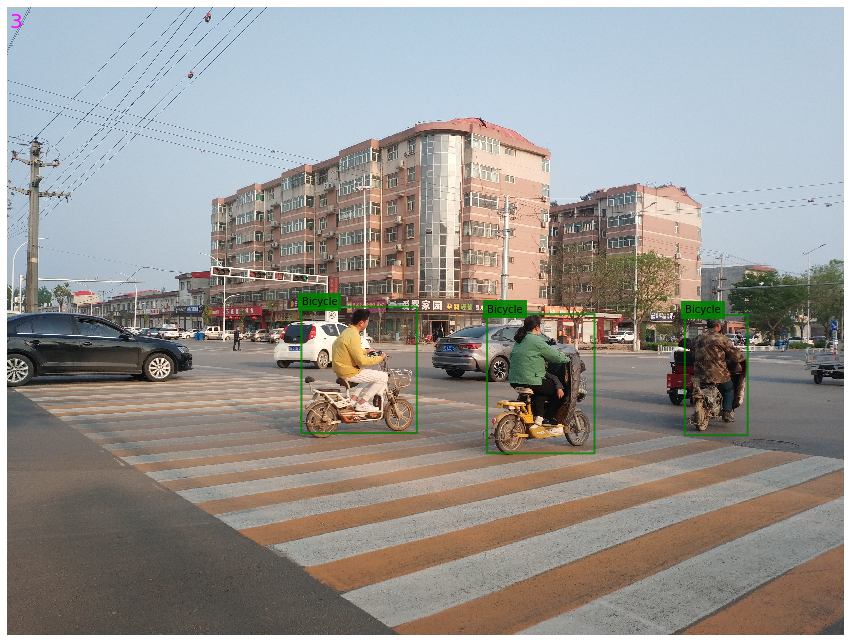

In [12]:
draw_bbox('./dataset/realworld_img\\wx_20200419175715.jpg')

##### 3.4 Distribution of the annotations： find out the suitable [Anchor](https://towardsdatascience.com/you-only-look-once-yolo-implementing-yolo-in-less-than-30-lines-of-python-code-97fb9835bfd2)

In the anchor-based object detection network (like: Faster-RCNN, SSD, YOLO v2 & v3, etc.), a crucial step is to scientifically set the anchor. It can be said that the reasonable setting of Anchor greatly affects the final model detection performance. So, what exactly is an anchor? It is a reference frame with different sizes and different aspect ratios preset on the image. (In fact, it is very similar to the window size set by the sliding window method). During training, the size and aspect ratio of the anchor need to be basically the same as the scale of the object to be detected. Otherwise, the number of samples with positive anchors may be extremely small, which may result in a large number of missed objects.In the YOLOv3 algorithm, the author uses K-means clustering to automatically determine the size and proportion of the anchor[参考文献YOLOv2](). Here we take a look at how this is done.

##### The distribution of the height and width of the object bounding BOX

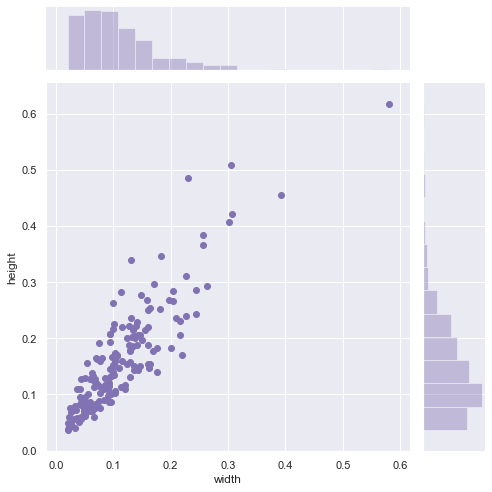

In [13]:
sns.set(style="darkgrid")

g = sns.jointplot("width", "height", data=annotations,
                  kind="scatter",
                  color="m", height=7)

##### When K = 9, the result of K-means clustering (it must be a multiple of 3 in YOLO). 
The height and width of these clustering center points and the aspect ratio will be used as the anchor parameter values in the YOLO algorithm.

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


C              0         1         2         3         4         5         6  \
width   0.043945  0.128907  0.292762  0.177667  0.082377  0.219742  0.580000   
height  0.071207  0.205487  0.432381  0.168364  0.114593  0.264667  0.616667   

C              7         8  
width   0.147565  0.104844  
height  0.286370  0.156087

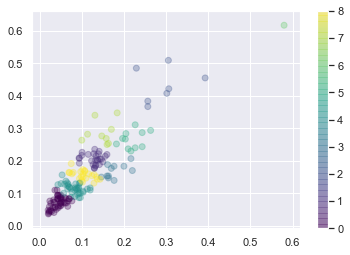

In [15]:
df_kmean = annotations[["width","height"]]

sk_kmeans = KMeans(n_clusters=9)
sk_kmeans.fit(df_kmean)
sk_C = sk_kmeans.predict(df_kmean)
df_kmean['C'] = sk_C

plt.scatter(df_kmean['width'], df_kmean['height'], c=sk_C, alpha=0.3, cmap='viridis')
plt.colorbar();

center_point = df_kmean.groupby('C').mean()
df2 = pd.DataFrame(center_point.values.T, index=center_point.columns, columns=center_point.index)
df2

##### Aspect Ratio
As can be seen from the figure below, the aspect ratio of the detected object is concentrated between 0.8 and 3.0

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


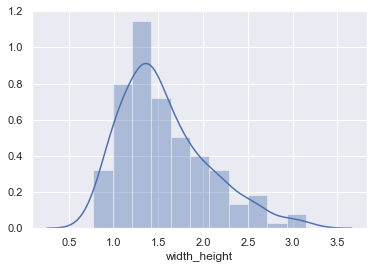

In [16]:
# 高宽比的分布
df_kmean['width_height'] = df_kmean['height'] / df_kmean['width']
df_kmean['class'] = annotations['class']

ax = sns.distplot(df_kmean['width_height'])

The distribution of the ratio of height to width in each cluster

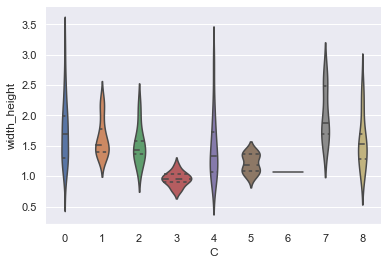

In [17]:
sns.violinplot(x="C", y="width_height",
               split=True, inner="quart",
               data=df_kmean)
sns.despine(left=True)



---

# 4. Data Augmentation

---

In Darknet's YOLOv3 algorithm, the author provides parameters for automatic data enhancement. It mainly involves flipping, rotating, color changing, brightness changing, diffraction, and adding noise. Therefore, this article uses all default parameters for data augmentation, so I won't make too many discuss here.

---

# 5. Build [Darknet](https://pjreddie.com/darknet/) environment in [Colab](https://colab.research.google.com/)

---
In the early days of model construction, I tried to use pytorch for YOLOv3 algorithm construction and debugging. But perhaps due to different environments, the open source version I have seen online always encounters various problems. Therefore, after deeply researching the website of the YOLO author, I chose to use Darknet, a framework developed by the author for YOLO, which is very robust to the YOLO algorithm and is a framework out of the box. No need for complicated coding skills, just modify the configuration file, you can easily adjust the YOLO algorithm and conduct training and testing.   
  
On the other hand, in the hardware environment, I used the free GPU server provided by Google Colab. It provides a good GPU and large memory, and can be easily connected to Google Drive, so it can easily carry out model training and save the results and working environment to google drive, even if the server is killed, it can also be copied from google drive,and continue to train or test.  
  
Therefore, this project selected Darknet and Colab to build the working environment of the target detection algorithm.  
*NB: The following code can only be run in the Colab cloud or Ubuntu operating system*


In [ ]:
# The following code can only be run in the Colab cloud or Ubuntu operating system
# Therefore, I actively throw an error reminder here
# Blocking the program to continue execution
assert False

##### Dependent packages

In [ ]:
from google.colab import drive
from google.colab import files
import cv2
import matplotlib.pyplot as plt

### Free GPU server: [Colab](https://colab.research.google.com/) tutorial
Help yourself quickly train your own YOLOv3 model in the cloud and test

##### Step 1: Turn on GPU acceleration
Colab does not enable GPU acceleration by default, we click [**modify**] [**notebook settings**] [**hardware acceleration**] [**GPU**]     
  
Okay now, GPU acceleration has been turned on

In [ ]:
# View the CUDA version
!/usr/local/cuda/bin/nvcc --version

##### Step 2: Load DarkNet
The author of Darknet provides a link on github. We download the latest version of darknet from, modify the configuration file, and then compile.  

In [ ]:
#Download from Github
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
#modify the configuration file
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
!cp -r /content/darknet/results /content/drive/'My Drive'/yolov3/darknet/results

In [ ]:
# Compile DarkNet
!make

##### Step 3: Mount Google Drive
Use the following code or chick "Mount Google Drive" in colab

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

Use the following code or chick "upload" or "download" in colab

In [ ]:
# Upload files to colab
def upload():
    from google.colab import files
    uploaded = files.upload() 
    for name, data in uploaded.items():
        with open(name, 'wb') as f:
            f.write(data)
            print ('saved file', name)

# Download files from colab 
def download(path):
    from google.colab import files
    files.download(path)

#### Step 4: Copy files to/from Google Drive
Use the following code

```
!cp <file to download> <destination to save file>
```

**NB:** Long-term misuse of Colab will automatically disconnect

What should I do? Open the console! (CTRL + SHIFT + i)   
   
Run the following javascript code   

```java
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
```
Automatic simulation click once every 10 minutes

In [19]:
# plot the image
def imShow(path):
    import cv2
    import matplotlib.pyplot as plt
    %matplotlib inline

    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()



---

# 6. Model training

---
As mentioned above, the following content will explain how to use darknet in colab to fine-tune the pre-trained model to carry out its own target detection task. And introduce the important parameters in the YOLO algorithm one by one, and finally display and analyze the training process.  
*NB: I have uploaded those configuration files to github, you can download and modify it yourself.*

##### Dependent packages

In [20]:
import os
import inspect
import random
import sys

##### Download the pre-trained model for fine-turn (tranfor-learning)

In [ ]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

#### 6.1 Train your own YOLOv3 detector
In order to create a custom YOLOv3 detector, you need the following:

*   Own labeled dataset
*   Configure your own .cfg file
*   obj.data and obj.names files
*   train.txt file and test.txt file, to store the path of dataset

##### Step 1: Put the data set into google drive

Pack the data set into obj.zip file and upload to drive  
Now we can use drive as the hard disk of our virtual machine

In [ ]:
# show the path
!ls /content/drive/'My Drive'/yolov3

Unzip to the data/obj directory

In [ ]:
# copy to root
!cp /content/drive/'My Drive'/yolov3/obj.zip ../
# unzip
!unzip ../obj.zip -d data/obj

##### Step 2: Change configuration file
We need to change those file
**.cfg file, obj.data, obj.names， train.txt** 文件

>I have modified these files and they are saved in the following path    
>/content/drive/‘My Drive’/yolov3

##### i) Edit the cfg file


In [ ]:
# Download
download('cfg/yolov3.cfg')

Edit the .cfg file to:


>**batch = 64**   
>**subdivisions = 16** 

*If you are warned of "out of memory", you can change the batch size to be smaller, but it is best to keep it to a multiple of 8. After testing, if the batch is too small, the model will be difficult to converge, so please use a larger batch size as much as possible without exceeding the memory limit. 64 is the most suitable choice in the colab environment.*

The next depends on the number of categories

>**max_batches = 2000**, **steps = 1600, 1800**   

I changed the 
>**classes = 5**   

in the three YOLO layers and 
>**filters = 30**    

in the three convolutional layers before the YOLO layers. 

**Optional:** In each of the three yolo layers in the cfg, change one line from **random = 1** to **random = 0** to speed up training but slightly reduce accuracy of model. Will also help save memory if you run into any memory issues.


In [ ]:
# Uplpad，from google drive
!cp /content/drive/'My Drive'/yolov3/yolov3_bicycle.cfg ./cfg

# upload from local
#%cd cfg
#upload()
#%cd .. 

##### ii) Update the obj.names and obj.data 
Create a new file **obj.names** Write the classes in our data set
>Manned
>Bicycle


Create a new file **obj.data** and modify it, write the following information

>classes = 5  
>train = data/train.txt  
>valid = data/test.txt  
>names = data/obj.names  
>backup = /mydrive/yolov3/backup/


*NB: Backup is where we save the weights throughout the training to avoid losing weight information. It is better to save weight in google drive.*

In [ ]:
# 从drive上传obj.names 和 obj.data 
!cp /content/drive/'My Drive'/yolov3/obj.data  ./data

# 从本地上传
#%cd data
#upload()
#%cd .. 

##### iii) create train.txt
 [code from github](https://github.com/theAIGuysCode/YoloGenerateTrainingFile/blob/master/generate_train.py/)

In [ ]:
import os

image_files = []
os.chdir(os.path.join("data", "obj"))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".jpg"):
        image_files.append("data/obj/" + filename)
os.chdir("..")
with open("train.txt", "w") as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()
os.chdir("..")

##### iiii)Change the configuration file to unix format
Because annotations, configuration files etc. are mainly modified in windows environment, these files need to be converted to unix format to be correctly identified and used

In [ ]:
!sudo apt install dos2unix

In [ ]:
!dos2unix ./data/bicycle_train.txt
!dos2unix ./data/bicycle_test.txt
!dos2unix ./data/yolo.data
!dos2unix ./data/yolo.names
!dos2unix ./cfg/yolov3_bicycle.cfg

#### Step 3: Download convolutional layer weights for fineturn
This model is trained based on the COCO dataset, and transfer learning on this basis can make up for the deficiencies of our dataset and computing power.

In [ ]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

##### Step 4: Training the model
Use the following code for model training:
```
!./darknet detector train <path to obj.data> <path to custom config> darknet53.conv.74 -dont_show
```

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_bicycle.cfg darknet53.conv.74 -dont_show

You can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you would aim for a loss under 2.

Save our model every 100 iterations into **yolov3_bicycle_last.weights**   
If we want start training again after stop, we can reload the weights!

```
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_bicycle_last.weights -dont_show
```

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_bicycle.cfg backup/yolov3_bicycle_last.weights -dont_show

In [ ]:
%cd /content/darknet
!./darknet detector test data/obj.data cfg/yolov3_bicycle.cfg backup/yolov3_bicycle_last.weights /content/drive/'My Drive'/yolov3/test6.png -thresh 0.05
imShow('predictions.jpg')

##### Step 5: Save the working environment
Next time we can load the complete working environment directly from google drive

In [ ]:
!cp -r /content/darknet /content/drive/'My Drive'/yolov3/final

##### Step 6: Continue to train the model through the copied working environment
Copy the working environment from google drive

In [ ]:
!cp -r /content/drive/'My Drive'/yolov3/darknet /content/
#Change permissions, make sure you can use it correctly
!chmod -R 777 /content/darknet

/content/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF

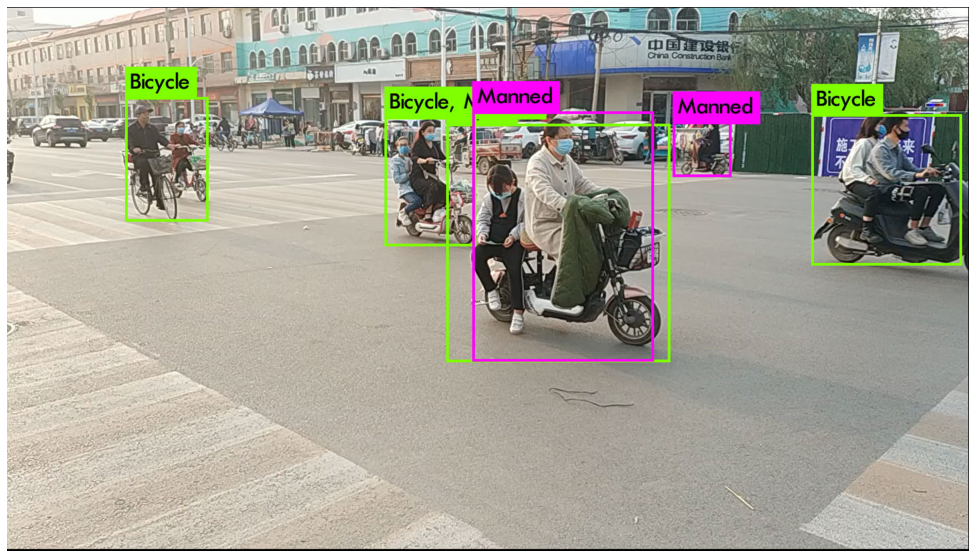

In [38]:
%cd /content/darknet
!./darknet detector test data/obj.data cfg/yolov3_bicycle.cfg backup/yolov3_bicycle_final.weights /content/drive/'My Drive'/yolov3/test.png -thresh 0.1
imShow('predictions.jpg')

In [ ]:
# Continue to train the model
%cd /content/darknet
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_bicycle.cfg backup/yolov3_bicycle_last.weights -dont_show >results/train.log

##### Step 7 : Using the trained model for test

Darknet provides a very convenient way for target detection of test images and videos.
##### For images
>detector test

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_bicycle.cfg backup/yolov3_bicycle_last.weights /content/IMG_20200419_173255.jpg -thresh 0.3
imShow('predictions.jpg')

##### For video
>detector demo -out_filename

In [ ]:
!./darknet detector demo data/obj.data cfg/yolov3_bicycle.cfg backup/yolov3_bicycle_final.weights -dont_show test//VID_20200419_173519.mp4 -out_filename test/output_final.mp4

### 6.2 Visualization of training process
During the training process, we save the training log in the **train.log** file, where we will parse the training log to understand the changes of the model during the training process.

##### Part 1: Extract training logs

In [21]:
# This file is used to extract training logs, 
#format log files after removing unparseable logs
#and generate new log files for visualization tools
import inspect
import os
import random
import sys
def extract_log(log_file,new_log_file,key_word):
    with open(log_file, 'r') as f: 
        with open(new_log_file, 'w') as train_log:   
            for line in f:
                if 'Syncing' in line:
                    continue
                if 'nan' in line:    # Remove log of division by zero error
                    continue
                if key_word in line:
                    train_log.write(line)
    return train_log
 
extract_log('train3.log','train_log_loss3.txt','avg loss')
extract_log('train2700.log','train_log_loss1.txt','avg loss')
extract_log('train2 (2700-4000).log','train_log_loss2.txt','avg loss')
# IOU: 
extract_log('train2700.log','train_log_iou.txt','IOU:')

<_io.TextIOWrapper name='train_log_iou.txt' mode='w' encoding='cp936'>

##### Part 2: Loss
As shown in the following formula, the Loss of the YOLO algorithm can be divided into 3 parts[7]: bound box coordinate loss, confidence loss, and classification loss.Loss Function in YOLOv3:
![Loss Function in YOLOv3](img_for_yolo/loss_function.png)  
In this function, the first part is the frame boundary loss. YOLOv3 calculate the Loss of (x, y, w, h) separately using the squared error loss function and add them together.
![Loss Function in YOLOv3](img_for_yolo/边框loss.jpg)  
The second part is the classification loss, where lambda represents the confidence level and determines whether there are objects in the grid. Use the squared error loss function to calculate the Loss of the class class.
![Loss Function in YOLOv3](img_for_yolo/class_loss.jpg) 
The last part is the confidence loss, which also uses the squared error loss function. Adding confidence loss can effectively improve the model's performance on the category imbalanced data set.
![Loss Function in YOLOv3](img_for_yolo/置信度loss.png) 
In short, we can see from the loss function that object detection is a multi-target task. It is necessary to ensure that the correct object is selected using the border, and the object is also classified correctly. And how to coordinate among multiple goals is often very complicated. Due to the ingenious design of the YOLO author, in this algorithm, the author chooses to reduce the loss of the first part first, and then synchronize the three parts. This approach ensures the efficiency of model training.

The following figure is the change of the model loss during the training. We can see that the model loss drops rapidly during at first. After 2000 iterations, the model gradually stabilized and began to decline slowly. After 5000 iterations, the model's effect reached its optimum, and then the loss began to rise, which meant that the model appeared to be over-fitting.

          loss  num  rate
0  2009.777710  1.0   0.0
1  2008.681274  2.0   0.0
2  2006.834351  3.0   0.0
3  2008.635986  4.0   0.0
4  2008.690918  5.0   0.0


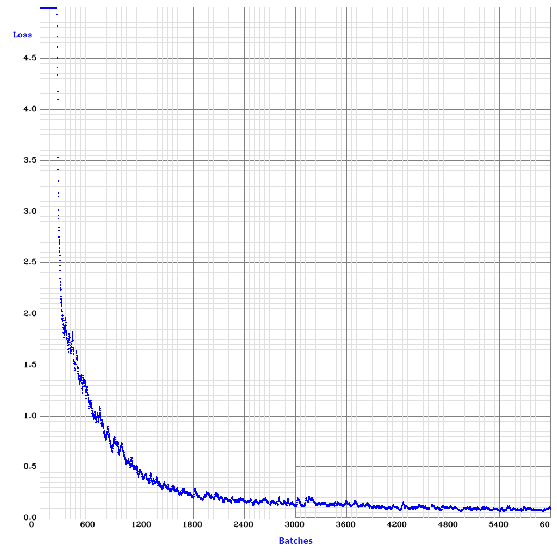

In [22]:
loss_log = pd.DataFrame()
with open('train_log_loss1.txt','r') as log_loss:
    for line in log_loss:
        line_list = line.split(",")
        if ':' in line_list[0] and 'rate' in line_list[2]:
            loss_dict = {}
            loss_info = line_list[0].split(": ")
            loss_dict['num'] = int(loss_info[0])
            loss_dict['loss'] = float(loss_info[1])
            loss_dict['rate'] = float(line_list[2].split(" ")[1])
            loss_log = loss_log.append(loss_dict,ignore_index=True)
print(loss_log.head(5))
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(mpimg.imread('model_results_loss_curv.png'))

##### Part 3: IOU  
IOU (Intersection over Union)[8], or cross-combination ratio, is a common evaluation standard in object detection, mainly to measure the degree of overlap between the Predict bounding box and Ground-truth bounding box generated by the model.The higher the IOU, the more accurate the model's identity of target's bounding.
![iou](img_for_yolo/iou.jpg)

As can be seen from the figure below, in the training phase of this model, IOU rose quickly at the beginning, and then slowly increased.

   class_rate       iou  no_obj_rate  number  obj_rate
0    0.860933  0.071995     0.457077   100.0  0.598056
1    0.764061  0.340694     0.457650   200.0  0.607109
2    0.624872  0.167809     0.457815   300.0  0.415053
3    0.337197  0.671879     0.457295   400.0  0.145366
4    0.650389  0.205502     0.457020   500.0  0.385715


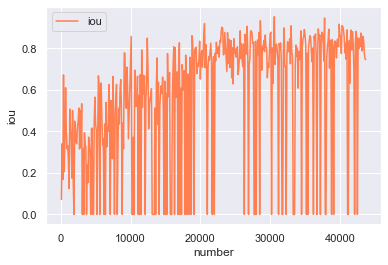

In [23]:
iou_log = pd.DataFrame()
with open('train_log_iou.txt','r') as log_iou:
    i = 0
    for line in log_iou:
        if 'Region 94' in line:
            i += 1
            if i%100 == 0:
                iou_info = {}
                iou_line = line.split(', ')
                iou_info['number'] = i
                iou_info['iou'] = float(iou_line[2].split(': ')[2])
                iou_info['class_rate'] = float(iou_line[4].split(': ')[1])
                iou_info['obj_rate'] = float(iou_line[5].split(': ')[1])
                iou_info['no_obj_rate'] = float(iou_line[6].split(': ')[1])
                iou_log = iou_log.append(iou_info,ignore_index=True)
print(iou_log.head(5))
sns.lineplot(x="number", y="iou",color="coral",label = 'iou',
             data=iou_log)

##### Part 4: object rate and no object rate  
These two parameters indicate whether the model selection box contains objects. It can be seen that at the beginning, the no object rate drops rapidly. At this stage, the main work of the model excludes the area that does not contain the target; then the accuracy of the coverage of the target, that is, the object rate gradually increases, and the IOU rises The process is similar.

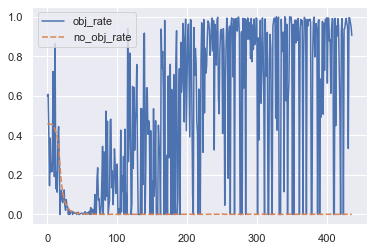

In [24]:
obj_rate = iou_log[["obj_rate","no_obj_rate"]]
sns.lineplot(data=obj_rate)

##### Part 5: Class rate  
Class rate refers to the classification accuracy rate of the target in the selection box. When iou is low, the class rate has been hovering around 0.5, and once the value of iou has been greatly improved, the classification accuracy of the model has also started to increase rapidly. This is consistent with the introduction of the loss function section above.

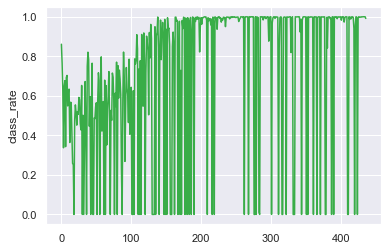

In [25]:
class_rate = iou_log[["class_rate"]]
sns.lineplot(x= class_rate.index, y="class_rate",data=class_rate,color=sns.xkcd_rgb["medium green"])

Due to the different proportions of different parts in the loss function, the loss of IOU will be relatively large at the beginning, and the classification accuracy problem will only start to be resolved after the IOU is low. Therefore, the training process of the model can be understood from the above two graphs. In the initial stage of training, the model first solves the problem of the accuracy of the framed object. At this time, IOU increases rapidly and the no object rate decreases rapidly. The accuracy of classification will increase rapidly after iou reaches 0.6. The same rule can be seen from the following model test effect display: at 2700, the target object's frame selection has been more accurate, but the accuracy rate of the target classification is lower; but after 2000 trainings, classification after 5000 iterations The accuracy of the check box has reached a high level; and after 6000 iterations, the loss has risen a bit, indicating that overfitting has occurred at this time. Therefore, this article selects the 5000th iteration model as the final model.



---

# 7. Results and discuss

---

The following part mainly uses test images to display and evaluate the model training process and the performance of the final model. Here I will show the results of the images tested during training, and we can observe the relationship between the actual model effect during training and the IOU, classification accuracy, etc. mentioned above.


##### 7.1 Model performance testing at various stages in the training process
The following pictures show the detection results when the model iterates 1000, 2700, 4000, 5000 and 6000 times respectively. At the beginning of the training, the recognition performance of the model was terrible; then iou was significantly improved after the 2700 times, but the classification accuracy was not high; while the model was trained to 4000 and 4,600 times, the model showed a relatively good performance at this stage, but the improvement is limited; finally when the model is trained to 6000 times, some objects are not accurately identified, which indicates that the model has begun to overfit at this time.

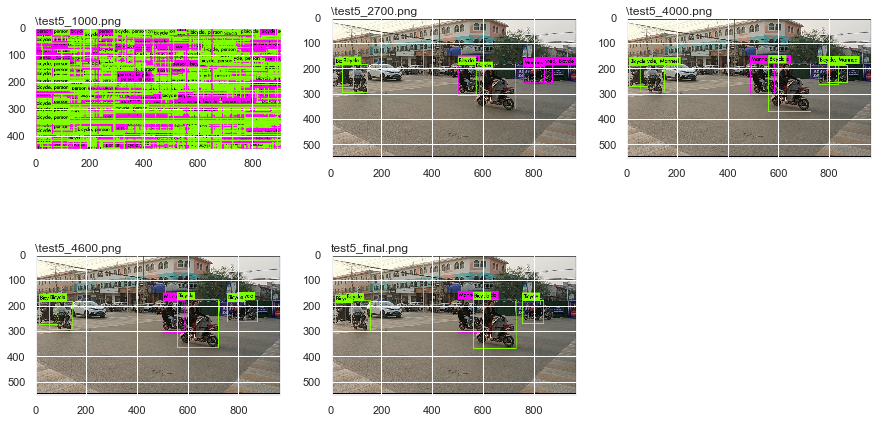

In [26]:
real_img_path = glob.glob(f"./test_result/test5*.png")
plt.figure(figsize = (15,8))
for i in range(1,6):
    img = real_img_path[i-1]
    plt.subplot(2,3,i)
    plt.imshow(mpimg.imread(img))
    plt.text(0,-10,img[-15:])
plt.show()

##### 7.2 Model performance testing in a real world video
After selecting the model trained at the 4600th iteration as the final model, I used it to detect the collected 720P video. The video results show that the YOLO model performs well. In the Colab environment, the detection speed can reach 27.4 FPS per second.   
   
However, the test video also shows the poor recognition of manned non-motor vehicles and the phenomenon of mistakenly identifying a person as a bicycle rider. This result is mainly due to the fact that in the collected data, there are a large number of normal rides and a small number of manned rides, so it is difficult to distinguish. And only on the side of the manned ride can it be clearly distinguished from the normal rider. Therefore, in the future, more images of various angles of manned riding can be collected as a data set.   
   
The full video can be seen from [**Youtube**](https://www.youtube.com/watch?v=PPovKJ-91Vg)

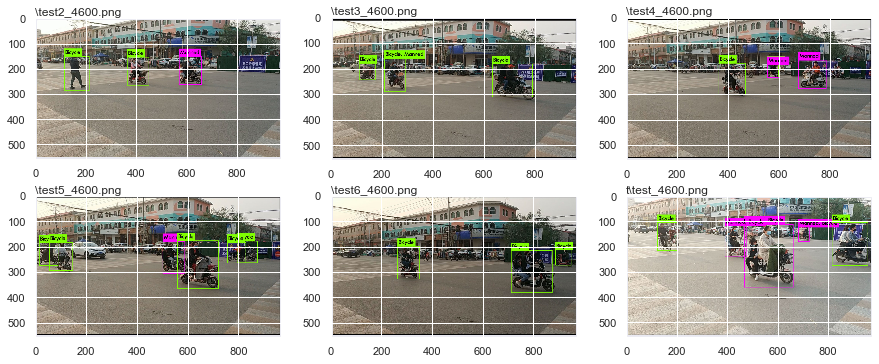

In [27]:
real_img_path = glob.glob(f"./test_result/test*_4600.png")
plt.figure(figsize = (15,6))
for i in range(1,7):
    img = real_img_path[i-1]
    plt.subplot(2,3,i)
    plt.imshow(mpimg.imread(img))
    plt.text(0,-10,img[-15:])
plt.show()


---
# 8. Conclusion
---

To sum up, this article provides a complete workflow for building a manned cycling detector. In this process, I completed a series of work from building a dataset, building a free GPU server working environment, adjusting parameters, monitor and analysis the model training process, and testing the effect of the model. Finally, a basic detector for manned cycling is built. The performance of the detector shows that it can be applied to real traffic environment. However, the model still has the space to improve, especially on the data set. On the other hand, during these days, I built a usable target detection model from scratch, which made me gain a lot knowledge and made me more confident in my future.  
##### Limitation
First of all, due to the lack of a stable and easy-to-use deep learning server, I can not do a lot of model training and comparison, so I only used the YOLOv3 model in this project. This means that it is difficult for me to find the optimal parameters of the detector. Also, the free Colab server is very unstable, and the settings that users must clicked every 5 minutes crashed me a lot. An easy-to-use and stable working environment is very important for deep learning, which can greatly reduce mental stress and make students feel happier in the process of learning deep learning.    
  
Secondly, my dataset needs to be expanded, since there are currently only 106 real-world images with unbalanced categories. The lack of datasets highly limits the effectiveness of the detector, especially in terms of classification accuracy, there are many manned riders are not detected.   
  
Finally, because Darknet is written in C language, as I am not proficient in C language, therefore it is difficult to modify the network structure or loss function of the detector. When the model's training log indicates bugs, I has no ability to modify the source code. And darknet is only applicable to the YOLO series of algorithms, so it is not convenient to quickly carry out comparison tests with other models such as SSD. Therefore, it may be more convenient to choose a more mature framework, like PyTorch, in the future, where I could get more community support.

##### Future research
In future research, I will first solve the above limitations. For example, use the paid version of Colab Pro; collect more real-world traffic images; and change the working environment to PyTorch. On the other hand, I hope to mining its fullest value. Then, I hope to use the model to analyze the temporal and spatial distribution of the behavior of cyclists in towns and provide a basis for traffic police departments to make decisions.  
  
Furthermore, based on this detector, I hope to be able to develop a reminder of the dangerous behavior of cyclists. In some scenarios, such as entrances and exits of communities, this detection tool could be used to automatically remind and record when manned cyclists are crossing. It might be beneficial to improve their riding safety awareness, and reduce the working pressure of traffic police.


---
# 9. References
---

>**[1]** 李成志, 李洋, & 何庆. (2019). 电动自行车交通事故中骑车人伤害程度的影响因素分析. 交通工程, (4), 6.   
>**[2]** 赵桂范, 刘明敏, 刘磊, 王深思, & 张子鹏. (2014). 人-车-路系统下电动自行车安全性试验. 中国公路学报, 27(2), 105-111.  
>**[3]** Abduljabbar, R., Dia, H., Liyanage, S., & Bagloee, S. A. (2019). Applications of artificial intelligence in transport: An overview. Sustainability, 11(1), 189.   
>**[4]** Lin, T. Y., Maire, M., Belongie, S., Hays, J., Perona, P., Ramanan, D., ... & Zitnick, C. L. (2014, September). Microsoft coco: Common objects in context. In European conference on computer vision (pp. 740-755). Springer, Cham.   
>**[5]** Redmon, J., & Farhadi, A. (2018). Yolov3: An incremental improvement. arXiv preprint arXiv:1804.02767.   
>**[6]** Dadi, H. S., & Pillutla, G. M. (2016). Improved face recognition rate using HOG features and SVM classifier. IOSR Journal of Electronics and Communication Engineering, 11(04), 34-44.   
>**[7]** Redmon, J., Divvala, S., Girshick, R., & Farhadi, A. (2016). You only look once: Unified, real-time object detection. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 779-788).   
>**[8]** Rezatofighi, H., Tsoi, N., Gwak, J., Sadeghian, A., Reid, I., & Savarese, S. (2019). Generalized intersection over union: A metric and a loss for bounding box regression. In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (pp. 658-666).
